In [122]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [123]:
df = pd.read_csv("giaitich1.csv")
df.head()

,Hours,Scores
0,2.0,4.1
1,4.6,6.7
2,2.5,4.7
3,8.0,8.2
4,3.0,5.0


In [124]:
len(df)

24

In [125]:
df_permutated = df.sample(frac = 1)
df_permutated

,Hours,Scores
3,8.0,8.2
15,0.5,1.2
2,2.5,4.7
13,2.8,4.2
18,5.6,7.7
0,2.0,4.1
20,3.1,4.5
1,4.6,6.7
7,5.0,7.0
16,2.1,3.5


In [126]:
train_size = 0.7
train_rows_size = int (len(df_permutated) * train_size)
train_rows_size

16

In [127]:
df_train = df_permutated[:train_rows_size]
df_test = df_permutated[train_rows_size:]

In [128]:
df_train

,Hours,Scores
3,8.0,8.2
15,0.5,1.2
2,2.5,4.7
13,2.8,4.2
18,5.6,7.7
0,2.0,4.1
20,3.1,4.5
1,4.6,6.7
7,5.0,7.0
16,2.1,3.5


In [129]:
df_test

,Hours,Scores
14,1.0,2.7
10,7.2,8.5
23,6.5,7.6
4,3.0,5.0
12,4.0,6.1
21,6.2,7.0
8,8.5,7.8
17,1.4,4.4


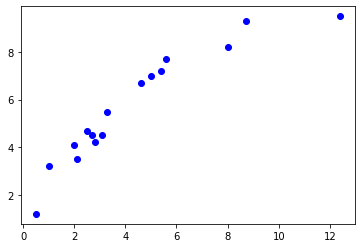

In [130]:
plt.plot(df_train.Hours, df_train.Scores, "bo")
plt.show()

In [131]:
def ln_reg_model(x, y, lr, iter):
    x = np.vstack((x.values, np.ones(x.values.size))).T
    y = y.values.reshape((x.shape[0],1))
    
    m = x.shape[0]

    theta = np.ones((x.shape[1], 1))
    cost_his = []

    for i in range (iter):
        y_pred = np.dot(x, theta)
        cost = (1 / (2 * m)) * np.sum(np.square(y_pred - y))

        cost_his.append(cost)
        d_theta = (1/m) * np.dot(x.T, y_pred - y)
        theta -= d_theta * lr
    return theta, cost_his

In [132]:
theta, cost_his = ln_reg_model(df_train.Hours, df_train.Scores, 0.00005, 150)

In [133]:
x_line = np.array([1,20])
x_line_mat = np.vstack((x_line, np.ones(x_line.size))).T
y_line = np.dot(x_line_mat, theta)

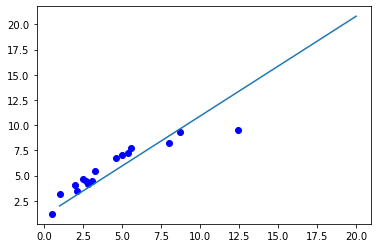

In [134]:
plt.plot(df_train.Hours, df_train.Scores, "bo")
plt.plot(x_line, y_line)
plt.show()

In [135]:
def predict(x, theta):
    x = np.vstack((x.values, np.ones(x.values.size))).T
    return np.dot(x, theta)
    

In [136]:
y_test = predict(df_test.Hours, theta)

In [137]:
print(y_test)

[[1.99323838]
 [8.13499569]
 [7.44157148]
 [3.97445042]
 [4.96505644]
 [7.14438967]
 [9.42278351]
 [2.38948079]]


In [138]:
print(df_test.Scores)

14    2.7
10    8.5
23    7.6
4     5.0
12    6.1
21    7.0
8     7.8
17    4.4
Name: Scores, dtype: float64


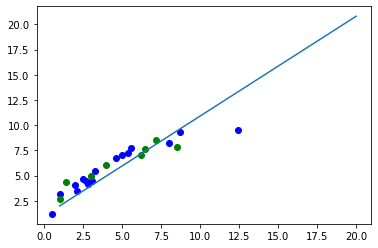

In [139]:
plt.plot(df_train.Hours, df_train.Scores, "bo")
plt.plot(df_test.Hours, df_test.Scores, "go")
plt.plot(x_line, y_line)
plt.show()